In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/Colab Notebooks/TOPICS IN APPLIED STATISTICS1/5/data/gender

/content/drive/My Drive/Colab Notebooks/TOPICS IN APPLIED STATISTICS1/5/data/gender


In [0]:
import pandas as pd
import numpy as np

x = pd.read_csv('x.csv',index_col=0)
x = x.T
y = pd.read_csv('y.csv',index_col=0)

In [0]:
x = np.array(x)
x = x.reshape(-1,300,300,3)

In [0]:
y = np.array(y)

In [0]:
import cv2
import numpy as np
y4=[]
for i in range(len(x)):
    img_label=np.where(y[i]=='male',1,0)
    y4.append(img_label)
y3=np.array(y4)
x3=x.astype('float32')/255.

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x3,y3,test_size=0.1,random_state=1, stratify=y)

y_train=y_train.reshape(-1)
y_test=y_test.reshape(-1)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1569, 300, 300, 3) (175, 300, 300, 3) (1569,) (175,)


In [8]:
#이후에는 이전학습을 시행하기 위해, 내장된 함수 VGG16를 불러오자. 
# weights는 imagenet에서 사용한거 그대로 사용. (ILSVRC)

from tensorflow.keras.applications import VGG16
vgg16_model=VGG16(weights='imagenet',include_top=False,input_shape=(300,300,3))

#inclue_top option은 위의 convolution 부분만 pre-trained모형을 사용하겠다는 의미. fc층은 내가 구성해서 만들겠다는 뜻.
#즉, 필터만 pre-trained 된 모형을 쓰겠다.
#fc층이 top임. back propagation 기준으로 생각한다.
# 이에따라, input_shape은 include_top이 false일때만 사용가능. 당연하다.


vgg16_model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
______________________________________________________________

In [11]:
#1 


# 아래처럼 하자. (과제)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout,MaxPooling2D, Conv2D
from tensorflow.keras.regularizers import l1

model_aug=Sequential()
model_aug.add(vgg16_model) # 이렇게 이전의 모형도 들어올 수 있음.
model_aug.add(Conv2D(1024,(3,3),activation='relu',kernel_regularizer=l1(0.0001)))
model_aug.add(MaxPooling2D(2,2))
model_aug.add(Flatten())
model_aug.add(Dense(128,activation='relu'))
model_aug.add(Dropout(0.5))
model_aug.add(Dense(1,activation='sigmoid'))
model_aug.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 9, 9, 512)         14714688  
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 1024)        4719616   
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 1024)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [0]:
vgg16_model.trainable=False

from tensorflow.keras.applications.vgg16 import preprocess_input
xx=[]
yy=[]
for i in range(len(x)):
    img=x[i]
    img=preprocess_input(img.reshape(1,300,300,3)) # VGG16모형을 만들때(preprocess_input에서만), input size를 4개로 받게끔 만듦. 그냥 그렇게만들어서 이렇게넣음.
    img_new=img.reshape(300,300,3)
    xx.append(img_new)
    img_label=np.where(y[i]=='male',1,0)
    yy.append(img_label)

xx=np.array(xx)
yy=np.array(yy)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xx,yy,test_size=0.1,random_state=1, stratify=yy)

In [0]:
vgg16_model.trainable=False

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers #compile 옵션에서 사용 / optimizer=optimizers.RMSprop(lr=2e-5)

train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=10, width_shift_range=0.1,
                               height_shift_range=0.1,horizontal_flip=True)
validation_datagen=ImageDataGenerator(rescale=1./255) #검증데이터는 자료증대를 하지 않아야 함.


In [0]:
train_generator=train_datagen.flow(x_train,y_train,batch_size=16)
validation_generator=validation_datagen.flow(x_test,y_test,batch_size=16)

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping('val_loss',mode='min',patience=3)
# ModelCheckpoint도 같이 써주면 좋다.

In [16]:
model_aug.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
model_aug_result=model_aug.fit_generator(train_generator,steps_per_epoch=x_train.shape[0]//16  , epochs=20, validation_data=validation_generator,validation_steps=x_test.shape[0]//16,callbacks=[early_stopping])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
98/98 [==============================] - 31s 314ms/step - loss: 2.7785 - acc: 0.7092 - val_loss: 1.2212 - val_acc: 0.8313
Epoch 2/20
98/98 [==============================] - 31s 313ms/step - loss: 0.9147 - acc: 0.8307 - val_loss: 0.6987 - val_acc: 0.8375
Epoch 3/20
98/98 [==============================] - 31s 313ms/step - loss: 0.6908 - acc: 0.8377 - val_loss: 0.5940 - val_acc: 0.8313
Epoch 4/20
98/98 [==============================] - 30s 311ms/step - loss: 0.6310 - acc: 0.8532 - val_loss: 0.5517 - val_acc: 0.8438
Epoch 5/20
98/98 [==============================] - 30s 310ms/step - loss: 0.5493 - acc: 0.8596 - val_loss: 0.6362 - val_acc: 0.8375
Epoch 6/20
98/98 [==============================] - 31s 311ms/step - loss: 0.5271 - acc: 0.8751 - val_loss: 0.5295 - val_acc: 0.8500
Epoch 7/20
98/98 [==============================] - 31s 312ms/step - loss: 0.5351 - acc: 0.8719 - val_loss: 0.5428 - val_acc: 

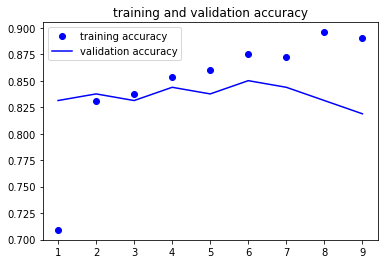

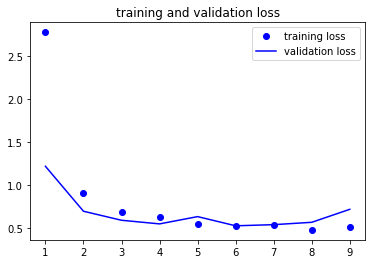

In [17]:
import matplotlib.pyplot as plt
acc=model_aug_result.history['acc']
val_acc=model_aug_result.history['val_acc']
loss=model_aug_result.history['loss']
val_loss=model_aug_result.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='training accuracy')
plt.plot(epochs, val_acc,'b',label='validation accuracy')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs, val_loss,'b',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

In [0]:
#2 아래는 과제와 관련없음. 그냥 참고.

In [0]:
import cv2
from tensorflow.keras.applications.vgg16 import preprocess_input
x5_vgg16=[]
y5=[]
for i in range(len(x)):
    img=x[i]
    img=preprocess_input(img.reshape(1,300,300,3)) # VGG16모형을 만들때(preprocess_input에서만), input size를 4개로 받게끔 만듦. 그냥 그렇게만들어서 이렇게넣음.
    img_new=vgg16_model.predict(img)
    x5_vgg16.append(img_new)
    img_label=np.where(y[i]=='male',1,0)
    y5.append(img_label)
    
# 이렇게 하면, convolution이 끝나고 난 1745개 데이터들에 대한 feature들이 저장이 됨.
# y는 별로 처리할게 없다.
# 이렇게 x데이터를 VGG16에 넣고 바꿔버림.


x5_vgg16=np.array(x5_vgg16)
print(x5_vgg16.shape)

# 아래의 결과로 나오는 1은 의미가없음. 단순히 input을 위해 그렇게 변경했던거임.
#그래서 이를 빼주기 위해, reshape를 진행한다. 

x5_vgg16=x5_vgg16.reshape(x5_vgg16.shape[0],x5_vgg16.shape[2],x5_vgg16.shape[3],x5_vgg16.shape[4])
y5=np.array(y5)



from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x5_vgg16,y5,test_size=0.1,random_state=1, stratify=y5)

(1744, 1, 9, 9, 512)


In [0]:
y_train=y_train.reshape(-1)
y_test=y_test.reshape(-1)

In [0]:
x_train.shape

(1569, 9, 9, 512)

In [0]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Flatten, Dropout
from tensorflow.keras.models import Sequential

modelvgg16=Sequential()
modelvgg16.add(Conv2D(1024,(3,3),activation='relu', input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3])))
modelvgg16.add(MaxPooling2D((2,2)))
modelvgg16.add(Flatten())
modelvgg16.add(Dense(64,activation='relu'))
modelvgg16.add(Dropout(0.5))
modelvgg16.add(Dense(1,activation='sigmoid'))
modelvgg16.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 7, 7, 1024)        4719616   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 1024)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                589888    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,309,569
Trainable params: 5,309,569
Non-trainable params: 0
____________________________________________

In [0]:
modelvgg16.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_vgg16=modelvgg16.fit(x_train,y_train,batch_size=32,epochs=20,validation_data=(x_test,y_test))

# validation accuracy를 보면, 굉장히 성능이 좋아졌음.
# 그래도 아직 overfitting이 되어있음.

Epoch 1/20
50/50 [==============================] - 1s 12ms/step - loss: 2.3598 - accuracy: 0.7457 - val_loss: 0.3191 - val_accuracy: 0.8971
Epoch 2/20
50/50 [==============================] - 0s 8ms/step - loss: 0.2669 - accuracy: 0.8668 - val_loss: 0.3186 - val_accuracy: 0.8857
Epoch 3/20
50/50 [==============================] - 0s 8ms/step - loss: 0.2083 - accuracy: 0.9082 - val_loss: 0.3490 - val_accuracy: 0.8629
Epoch 4/20
50/50 [==============================] - 0s 8ms/step - loss: 0.1795 - accuracy: 0.9120 - val_loss: 0.3488 - val_accuracy: 0.9143
Epoch 5/20
50/50 [==============================] - 0s 8ms/step - loss: 0.1062 - accuracy: 0.9496 - val_loss: 0.4079 - val_accuracy: 0.9086
Epoch 6/20
50/50 [==============================] - 0s 8ms/step - loss: 0.0896 - accuracy: 0.9586 - val_loss: 0.4027 - val_accuracy: 0.9143
Epoch 7/20
50/50 [==============================] - 0s 8ms/step - loss: 0.0490 - accuracy: 0.9751 - val_loss: 0.7396 - val_accuracy: 0.8629
Epoch 8/20
50/50 [=

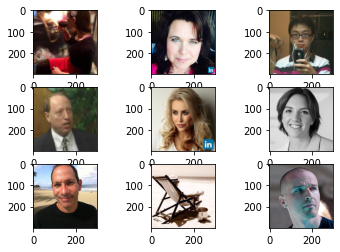

In [0]:
import matplotlib.pyplot as plt
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i]) #실수로만 받기 때문에 나타내려면 실수화 해야한다.
  
plt.show()

In [0]:
y_train[0:9]

array([0, 0, 1, 1, 0, 0, 1, 0, 1])

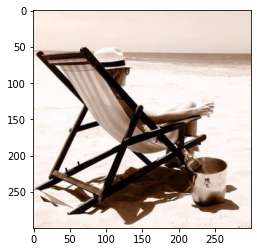

In [0]:
plt.imshow(x_train[7])